# Artificial Neural Networks and Deep Learning

---

## Homework 2: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 2` in your Google Drive.
2. Upload the `mars_for_students.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 2 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.csv` file to Kaggle.


## 🌐 Connect Colab to Google Drive

In [1]:
#from google.colab import drive

#drive.mount("/gdrive")
#%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 2

## ⚙️ Import Libraries

In [2]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

2024-12-03 19:48:28.780687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 19:48:28.818960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 19:48:28.830549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 19:48:28.859865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 19:48:30.518621: W tensorflow/compiler/tf2

TensorFlow version: 2.17.0
Keras version: 3.4.1
GPU devices: 1


I0000 00:00:1733251715.003492   73818 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733251715.092367   73818 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733251715.093947   73818 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## ⏳ Load and prepare the Data

In [3]:
data = np.load("mars_for_students.npz")

training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)


In [4]:
# Remove outliers (containing aliens)
#outliers = [62, 79, 125, 139, 142, 147, 152, 156, 170, 210, 217, 266, 289, 299, 313, 339, 348, 365, 412, 417, 426, 450, 461, 536, 552, 669, 675, 741, 744, 747, 799, 802, 808, 820, 821, 849, 863, 890, 909, 942, 971, 1005, 1057, 1079, 1082, 1092, 1095, 1106, 1119, 1125, 1177, 1194, 1224, 1247, 1248, 1258, 1261, 1262, 1306, 1324, 1365, 1370, 1443, 1449, 1508, 1509, 1519, 1551, 1584, 1588, 1628, 1637, 1693, 1736, 1767, 1768, 1782, 1813, 1816, 1834, 1889, 1925, 1942, 1975, 1979, 2000, 2002, 2086, 2096, 2110, 2111, 2151, 2161, 2222, 2235, 2239, 2242, 2301, 2307, 2350, 2361, 2365, 2372, 2414, 2453, 2522, 2535, 2561, 2609, 2614]
#X_train = np.delete(X_train, outliers, axis=0)
#y_train = np.delete(y_train, outliers, axis=0)

# Print the new shape
print(f"Training X shape after outlier removal: {X_train.shape}")
print(f"Training y shape after outlier removal: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape after outlier removal: (2615, 64, 128)
Training y shape after outlier removal: (2615, 64, 128)
Test X shape: (10022, 64, 128)


In [5]:
# Add color channel and rescale pixels between 0 and 1
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")

Input shape: (64, 128, 1)
Number of classes: 5


In [6]:
# Split into training and validation (80-20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=seed, test_size=0.2)

In [7]:
category_map = {
    0: 0,  # background
    1: 1,  # soil
    2: 2,  # bedrock
    3: 3,  # sand
    4: 4,  # big rock
}

def apply_category_mapping(label):
    """
    Apply category mapping to labels.
    """
    keys_tensor = tf.constant(list(category_map.keys()), dtype=tf.int32)
    vals_tensor = tf.constant(list(category_map.values()), dtype=tf.int32)
    table = tf.lookup.StaticHashTable(
        tf.lookup.KeyValueTensorInitializer(keys_tensor, vals_tensor),
        default_value=0
    )
    return table.lookup(label)

In [8]:
@tf.function
def random_flip(image, label, seed=None):
    """Consistent random horizontal flip."""
    if seed is None:
        seed = np.random.randint(0, 1000000)
    flip_prob = tf.random.uniform([], seed=seed)
    image = tf.cond(
        flip_prob > 0.5,
        lambda: tf.image.flip_left_right(image),
        lambda: image
    )
    label = tf.cond(
        flip_prob > 0.5,
        lambda: tf.image.flip_left_right(label),
        lambda: label
    )
    return image, label

In [9]:
import keras_cv 

augmenter = keras_cv.layers.Augmenter(
    [
        #keras_cv.layers.RandAugment(value_range=(0, 1),seed=seed),
        #keras_cv.layers.CutMix(seed=seed),
        keras_cv.layers.AugMix(value_range=(0, 1),seed=seed),
    ],
)

/home/francezco/Desktop/exams/AN2DL/Lab/an2dl_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
I0000 00:00:1733251719.460312   73818 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733251719.462318   73818 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733251719.464086   73818 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value

In [10]:
def make_dataset(images, labels, batch_size, shuffle=True, augment=False, seed=None):
    """
    Create a memory-efficient TensorFlow dataset.
    """
    # Add an axis to labels
    new_labels = labels[..., np.newaxis]

    # Create dataset from file paths
    dataset = tf.data.Dataset.from_tensor_slices((images, new_labels))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=batch_size * 2, seed=seed)

    # Apply category mapping
    dataset = dataset.map(
        lambda x, y: (x, apply_category_mapping(y)),
        num_parallel_calls=tf.data.AUTOTUNE
    )

    if augment:
        dataset = dataset.map(
            lambda x, y: (augmenter(x), y),
            num_parallel_calls=tf.data.AUTOTUNE
        )

    # Batch the data
    dataset = dataset.batch(batch_size, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

In [11]:
batch_size = 64

# Create the datasets
print("Creating datasets...")
train_dataset = make_dataset(
    X_train, y_train.astype('int32'),
    batch_size=batch_size,
    shuffle=True,
    augment=True,
    seed=seed
)

val_dataset = make_dataset(
    X_val, y_val.astype('int32'),
    batch_size=batch_size,
    shuffle=False
)

print("Datasets created!")

# Check the shape of the data
for images, labels in train_dataset.take(1):
    input_shape = images.shape[1:]
    print(f"\nInput shape: {input_shape}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Labels dtype:", labels.dtype)
    break

Creating datasets...
Datasets created!

Input shape: (64, 128, 1)
Images shape: (64, 64, 128, 1)
Labels shape: (64, 64, 128, 1)
Labels dtype: <dtype: 'int32'>


2024-12-03 19:48:45.619131: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node aug_mix_1/while/loop_body_control/_22/_21}}]]
	 [[aug_mix_1/while/body/_1/aug_mix_1/while/while/body/_63/aug_mix_1/while/while/cond_7/pivot_t/_179/_76]] [type.googleapis.com/tensorflow.DerivedStatus='']
2024-12-03 19:48:45.619225: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16725254230426550672
2024-12-03 19:48:45.619247: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: CANCELLED: RecvAsync is cancelled.
	 [[{{node aug_mix_1/while/loop_body_control/_22/_21}}]] [type.googleapis.com/tensorflow.DerivedStatus='']
2024-12-03 19:48:45.619281: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3277366136976999154
2024-12-03 19:48:45.619304: I tensorflow/core/framework/local_re

## Analyze the data

Visualizing examples from the training set:


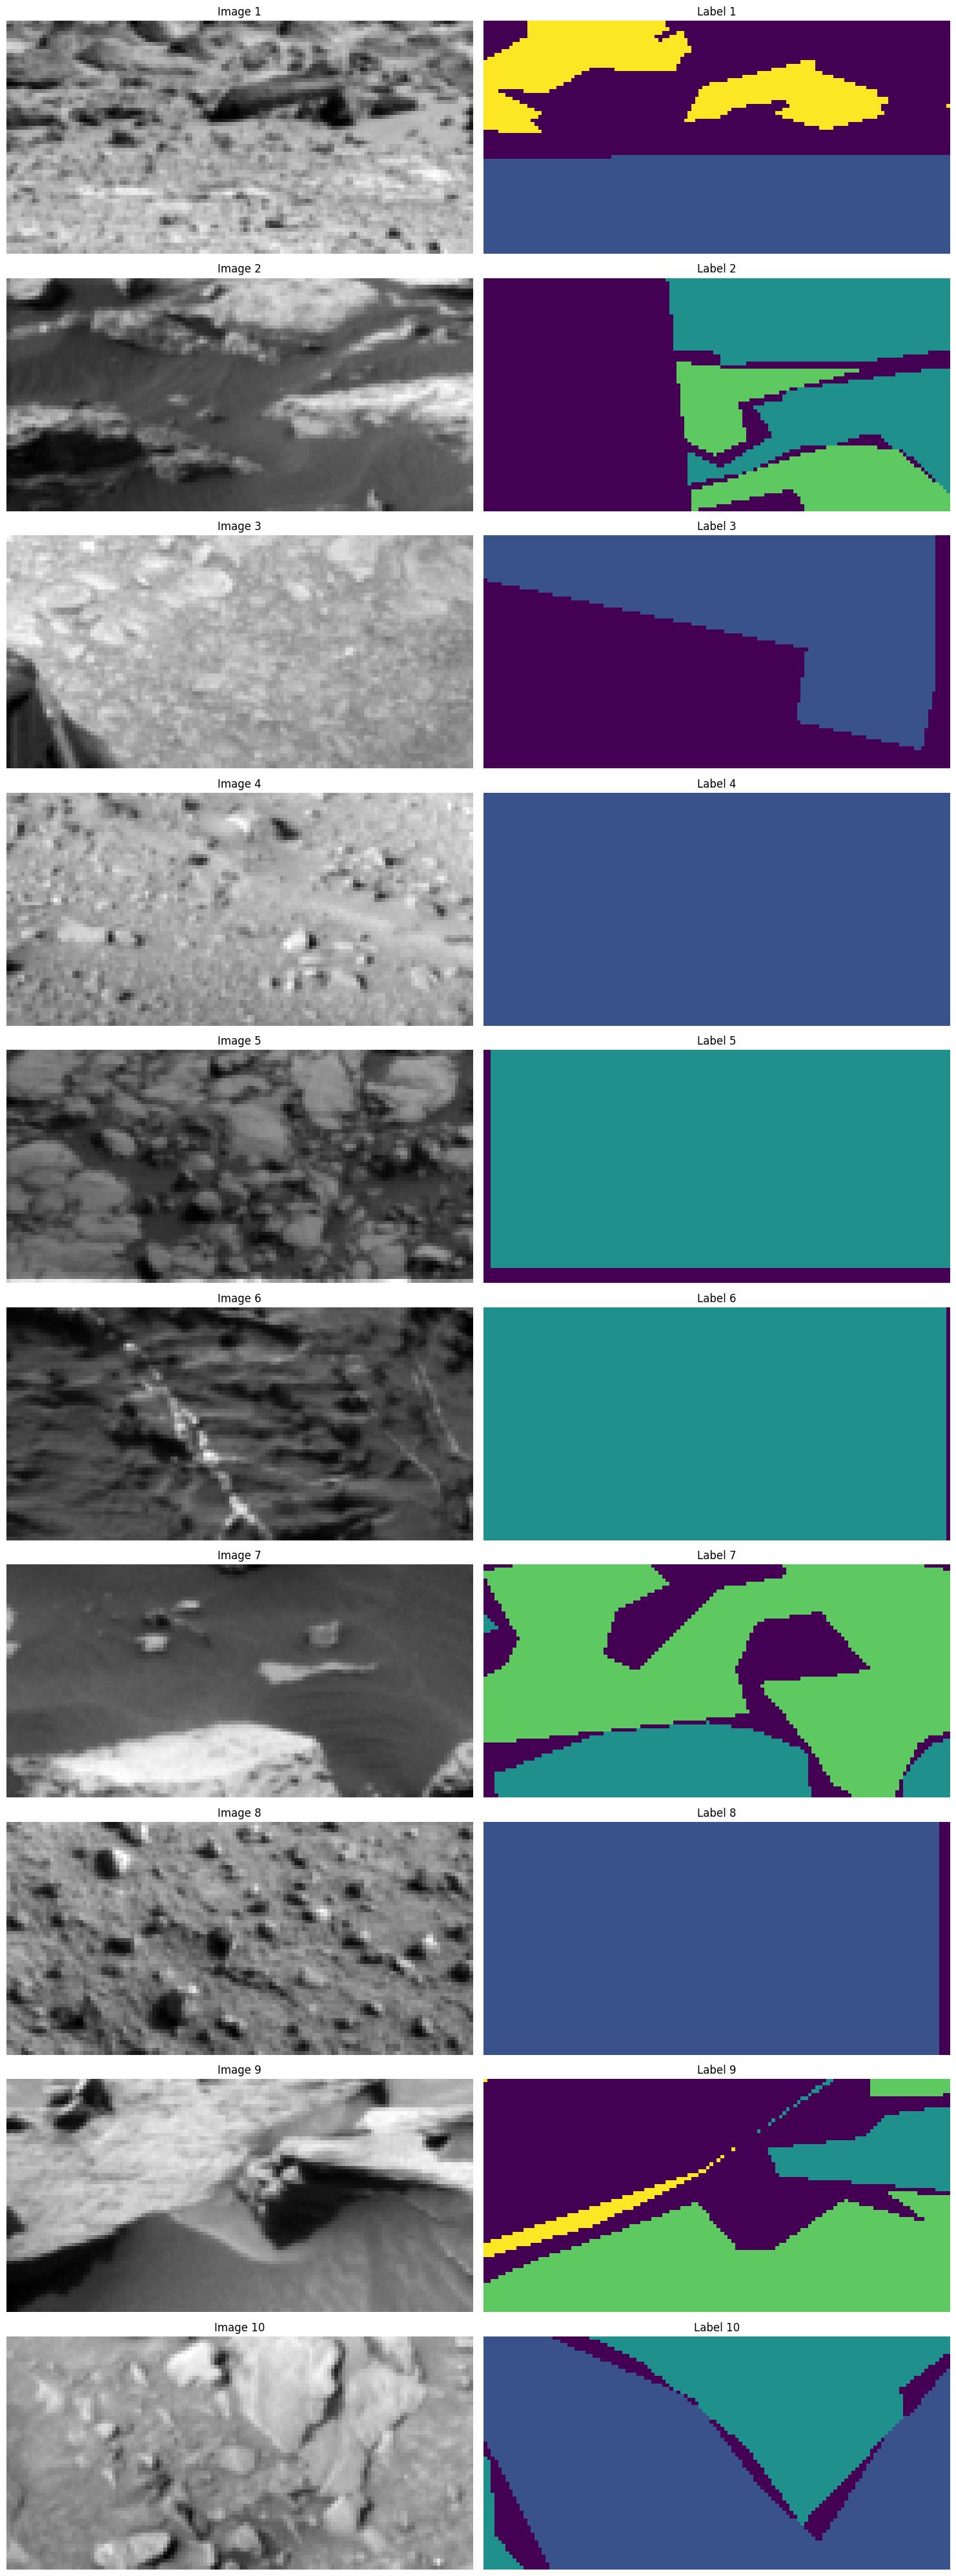

In [12]:
def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

def apply_colormap(label, colormap=None):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    if colormap is None:
        num_classes = len(np.unique(label))
        colormap = create_segmentation_colormap(num_classes)

    # Apply the colormap
    colored = colormap[label.astype(int)]

    return colored

def plot_sample_batch(images, labels, num_samples=3):
    """
    Display some image and label pairs from the dataset.
    """
    plt.figure(figsize=(15, 4*num_samples))

    colormap = create_segmentation_colormap(num_classes)

    for j in range(min(num_samples, len(images))):
        # Plot original image
        plt.subplot(num_samples, 2, j*2 + 1)
        plt.imshow(images[j], cmap='grey')
        plt.title(f'Image {j+1}')
        plt.axis('off')

        # Plot colored label
        plt.subplot(num_samples, 2, j*2 + 2)
        colored_label = apply_colormap(labels[j], colormap)
        plt.imshow(colored_label)
        plt.title(f'Label {j+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

# Visualize examples from the training set
print("Visualizing examples from the training set:")
plot_sample_batch(X_train, y_train, num_samples=10)

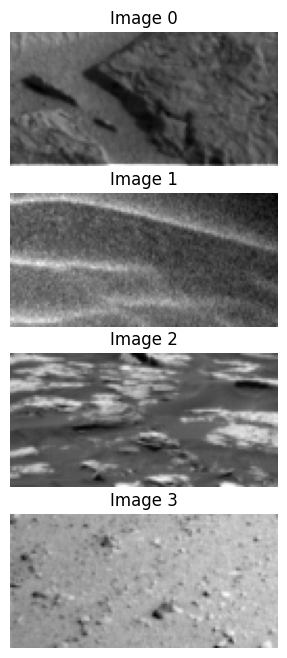

In [13]:
# Visualize examples from the test set.
num_samples = 4
plt.figure(figsize=(15, 2*num_samples))

colormap = create_segmentation_colormap(num_classes)

for j in range(min(num_samples, len(X_test))):
    plt.subplot(num_samples, 1, j+1)
    plt.imshow(X_test[j], cmap='grey')
    plt.title(f'Image {j}')
    plt.axis('off')

## 🛠️ Define the model

In [14]:
def unet_block(input_tensor, filters, kernel_size=3, activation='relu', stack=2, name=''):
    # Initialise the input tensor
    x = input_tensor

    # Apply a sequence of Conv2D, Batch Normalisation, and Activation layers for the specified number of stacks
    for i in range(stack):
        x = tfkl.Conv2D(filters, kernel_size=kernel_size, padding='same', name=name + 'conv' + str(i + 1))(x)
        x = tfkl.BatchNormalization(name=name + 'bn' + str(i + 1))(x)
        x = tfkl.Activation(activation, name=name + 'activation' + str(i + 1))(x)

    # Return the transformed tensor
    return x

In [15]:
def get_unet_model(input_shape=(64, 128, 1), num_classes=num_classes, seed=seed):
    tf.random.set_seed(seed)
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    # Downsampling path
    down_block_1 = unet_block(input_layer, 32, name='down_block1_')
    d1 = tfkl.MaxPooling2D()(down_block_1)

    down_block_2 = unet_block(d1, 64, name='down_block2_')
    d2 = tfkl.MaxPooling2D()(down_block_2)

    # Bottleneck
    bottleneck = unet_block(d2, 128, name='bottleneck')

    # Upsampling path
    u1 = tfkl.UpSampling2D()(bottleneck)
    u1 = tfkl.Concatenate()([u1, down_block_2])
    u1 = unet_block(u1, 64, name='up_block1_')

    u2 = tfkl.UpSampling2D()(u1)
    u2 = tfkl.Concatenate()([u2, down_block_1])
    u2 = unet_block(u2, 32, name='up_block2_')

    # Output Layer
    output_layer = tfkl.Conv2D(num_classes, kernel_size=1, padding='same', activation="softmax", name='output_layer')(u2)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='UNet')
    return model

In [16]:
# Define parameters
epochs = 1000
patience = 30
learning_rate = 1e-3

Model: "UNet"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer       │ (None, 64, 128, │         0 │ -              │   -   │
│ (InputLayer)      │ 1)              │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_conv1 │ (None, 64, 128, │       320 │ input_layer[0… │   Y   │
│ (Conv2D)          │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_bn1   │ (None, 64, 128, │       128 │ down_block1_c… │   Y   │
│ (BatchNormalizat… │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_acti… │ (None, 64, 128, │         0 │ down_block1_b… │   -   │
│ (Activation)      │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_conv2 │ (None, 64, 128, │     9,248 │ down_block1_a… │   Y   │
│ (Conv2D)          │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_bn2   │ (None, 64, 128, │       128 │ down_block1_c… │   Y   │
│ (BatchNormalizat… │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block1_acti… │ (None, 64, 128, │         0 │ down_block1_b… │   -   │
│ (Activation)      │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ max_pooling2d     │ (None, 32, 64,  │         0 │ down_block1_a… │   -   │
│ (MaxPooling2D)    │ 32)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_conv1 │ (None, 32, 64,  │    18,496 │ max_pooling2d… │   Y   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_bn1   │ (None, 32, 64,  │       256 │ down_block2_c… │   Y   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_acti… │ (None, 32, 64,  │         0 │ down_block2_b… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_conv2 │ (None, 32, 64,  │    36,928 │ down_block2_a… │   Y   │
│ (Conv2D)          │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_bn2   │ (None, 32, 64,  │       256 │ down_block2_c… │   Y   │
│ (BatchNormalizat… │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ down_block2_acti… │ (None, 32, 64,  │         0 │ down_block2_b… │   -   │
│ (Activation)      │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ max_pooling2d_1   │ (None, 16, 32,  │         0 │ down_block2_a… │   -   │
│ (MaxPooling2D)    │ 64)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ bottleneckconv1   │ (None, 16, 32,  │    73,856 │ max_pooling2d… │   Y   │
│ (Conv2D)          │ 128)            │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ bottleneckbn1     │ (None, 16, 32,  │       512 │ bottleneckcon… │   Y 

 Total params: 473,669 (1.81 MB)

 Trainable params: 472,389 (1.80 MB)

 Non-trainable params: 1,280 (5.00 KB)

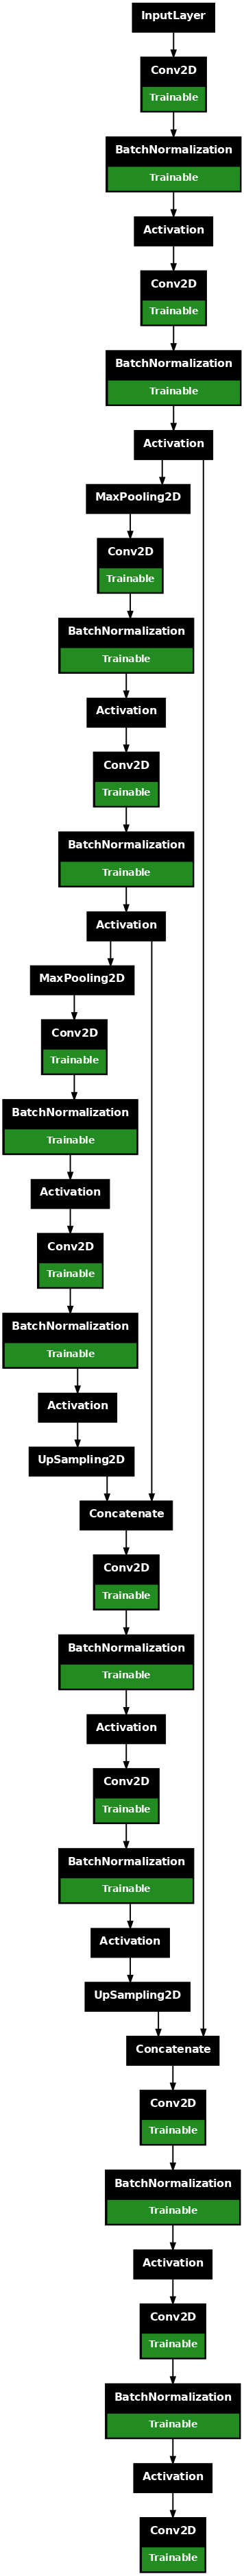

In [17]:
model = get_unet_model()

# Print a detailed summary of the model with expanded nested layers and trainable parameters.
model.summary(expand_nested=True, show_trainable=True)

# Generate and display a graphical representation of the model architecture.
tf.keras.utils.plot_model(model, show_trainable=True, expand_nested=True, dpi=70)

## Train the model

In [18]:
# Define custom Mean Intersection Over Union metric
@tfk.utils.register_keras_serializable()
class MeanIntersectionOverUnion(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, labels_to_exclude=None, name="mean_iou", dtype=None):
        super(MeanIntersectionOverUnion, self).__init__(num_classes=num_classes, name=name, dtype=dtype)
        if labels_to_exclude is None:
            labels_to_exclude = [0]  # Default to excluding label 0
        self.labels_to_exclude = labels_to_exclude

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.math.argmax(y_pred, axis=-1)

        # Flatten the tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # Apply mask to exclude specified labels
        for label in self.labels_to_exclude:
            mask = tf.not_equal(y_true, label)
            y_true = tf.boolean_mask(y_true, mask)
            y_pred = tf.boolean_mask(y_pred, mask)

        # Update the state
        return super().update_state(y_true, y_pred, sample_weight)

# Visualization callback
class VizCallback(tf.keras.callbacks.Callback):
    def __init__(self, image, label, frequency=5):
        super().__init__()
        self.image = image
        self.label = label
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.frequency == 0:  # Visualize only every "frequency" epochs
            image, label = self.image, self.label
            label = apply_category_mapping(label)
            pred = self.model.predict(image, verbose=0)
            y_pred = tf.math.argmax(pred, axis=-1)
            y_pred = y_pred.numpy()

            # Create colormap
            colormap = create_segmentation_colormap(num_classes)

            plt.figure(figsize=(16, 4))

            # Input image
            plt.subplot(1, 3, 1)
            plt.imshow(image[0], cmap='grey')
            plt.title("Input Image")
            plt.axis('off')

            # Ground truth
            plt.subplot(1, 3, 2)
            colored_label = apply_colormap(label.numpy(), colormap)
            plt.imshow(colored_label)
            plt.title("Ground Truth Mask")
            plt.axis('off')

            # Prediction
            plt.subplot(1, 3, 3)
            colored_pred = apply_colormap(y_pred[0], colormap)
            plt.imshow(colored_pred)
            plt.title("Predicted Mask")
            plt.axis('off')

            plt.tight_layout()
            plt.show()
            plt.close()

In [19]:
# Define a custom loss
class CustomLoss(tfk.losses.Loss):
    def __init__(self, alpha, name='custom_loss', **kwargs):
        super(CustomLoss, self).__init__(name=name, **kwargs)
        self.alpha = alpha
        self.focal = tfk.losses.CategoricalFocalCrossentropy()
        self.dice = tfk.losses.Dice()

    def call(self, y_true, y_pred):
        # Calculate the cross-entropy loss
        return (1-self.alpha)*self.focal.call(y_true, y_pred)+self.alpha*self.dice.call(y_true, y_pred)

In [20]:
# Compile the model
print("Compiling model...")
model.compile(
    loss=CustomLoss(0.2),
    optimizer=tf.keras.optimizers.AdamW(learning_rate),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=num_classes, labels_to_exclude=[0])]
)
print("Model compiled!")

Compiling model...
Model compiled!


In [21]:
# Setup callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_mean_iou',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

image, label = val_dataset.take(1).get_single_element()
viz_callback = VizCallback(image[11:12,...], label[11:12,...])

reduce_lr_callback = tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=patience/2, factor=0.1, min_lr=learning_rate/100)

callbacks = [early_stopping, viz_callback, reduce_lr_callback]

Epoch 1/1000


I0000 00:00:1733251742.593885   74012 service.cc:146] XLA service 0x77657c002bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733251742.593918   74012 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-12-03 19:49:03.178451: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-03 19:49:15.564567: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1733251759.979441   74012 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733251760.299404   74012 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 1/33 ━━━━━━━━━━━━━━━━━━━━ 23:50 45s/step - accuracy: 0.2366 - loss: 1.8885 - mean_iou: 0.0995

I0000 00:00:1733251774.926130   74012 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.2043 - loss: 1.4770 - mean_iou: 0.0868

E0000 00:00:1733251796.097759   74012 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733251796.405393   74012 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733251797.535777   74012 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733251797.886580   74012 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1733251798.267683   74012 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2043 - loss: 1.4747 - mean_iou: 0.0866   

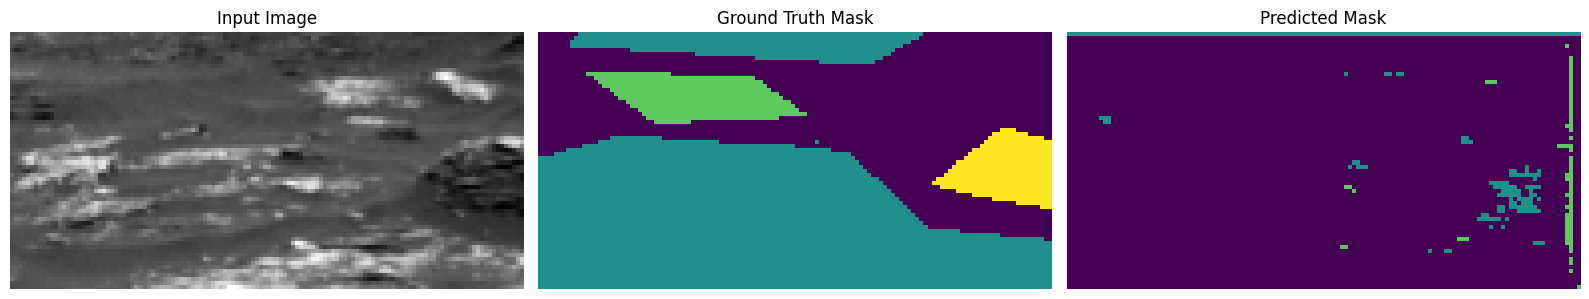

33/33 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.2042 - loss: 1.4725 - mean_iou: 0.0864 - val_accuracy: 0.2220 - val_loss: 1.3626 - val_mean_iou: 0.0188 - learning_rate: 0.0010
Epoch 2/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 339ms/step - accuracy: 0.2134 - loss: 1.3510 - mean_iou: 0.0871 - val_accuracy: 0.2012 - val_loss: 1.3620 - val_mean_iou: 0.0535 - learning_rate: 0.0010
Epoch 3/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 311ms/step - accuracy: 0.2152 - loss: 1.3433 - mean_iou: 0.0898 - val_accuracy: 0.1957 - val_loss: 1.3616 - val_mean_iou: 0.0535 - learning_rate: 0.0010
Epoch 4/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - accuracy: 0.2065 - loss: 1.3476 - mean_iou: 0.0828 - val_accuracy: 0.1951 - val_loss: 1.3614 - val_mean_iou: 0.0538 - learning_rate: 0.0010
Epoch 5/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.1870 - loss: 1.3611 - mean_iou: 0.0768 - val_accuracy: 0.1959 - val_loss: 1.3611 - val_mean_iou: 0.0565 - learning_rate: 0.0010
Epoch 6/1000
33/33 ━━━━━━━━━━━

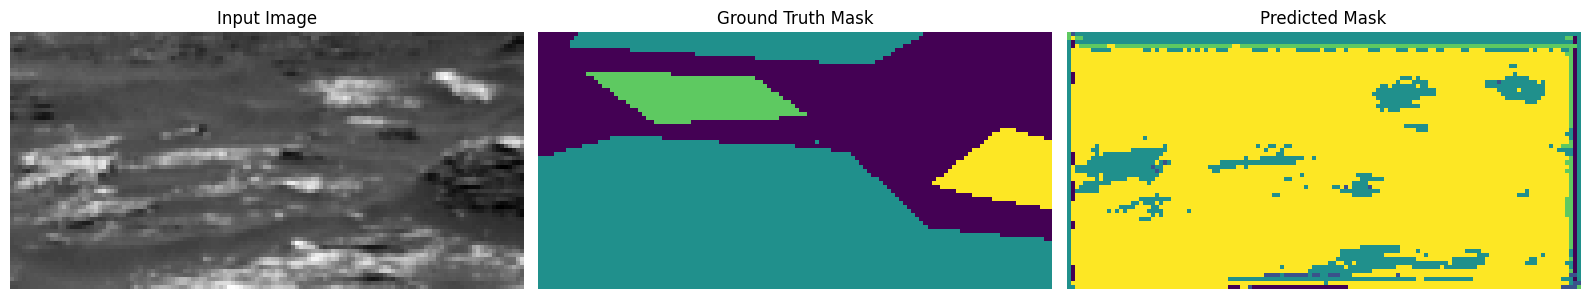

33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 347ms/step - accuracy: 0.1939 - loss: 1.3501 - mean_iou: 0.0804 - val_accuracy: 0.0948 - val_loss: 1.3610 - val_mean_iou: 0.0470 - learning_rate: 0.0010
Epoch 7/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 336ms/step - accuracy: 0.1995 - loss: 1.3514 - mean_iou: 0.0842 - val_accuracy: 0.0820 - val_loss: 1.3610 - val_mean_iou: 0.0483 - learning_rate: 0.0010
Epoch 8/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 313ms/step - accuracy: 0.1914 - loss: 1.3406 - mean_iou: 0.0804 - val_accuracy: 0.0802 - val_loss: 1.3610 - val_mean_iou: 0.0467 - learning_rate: 0.0010
Epoch 9/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 381ms/step - accuracy: 0.1961 - loss: 1.3423 - mean_iou: 0.0799 - val_accuracy: 0.1519 - val_loss: 1.3609 - val_mean_iou: 0.0864 - learning_rate: 0.0010
Epoch 10/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - accuracy: 0.1994 - loss: 1.3498 - mean_iou: 0.0814 - val_accuracy: 0.0731 - val_loss: 1.3609 - val_mean_iou: 0.0451 - learning_rate: 0.0010
Epoch 11/1000
33/33 ━━━━━━━

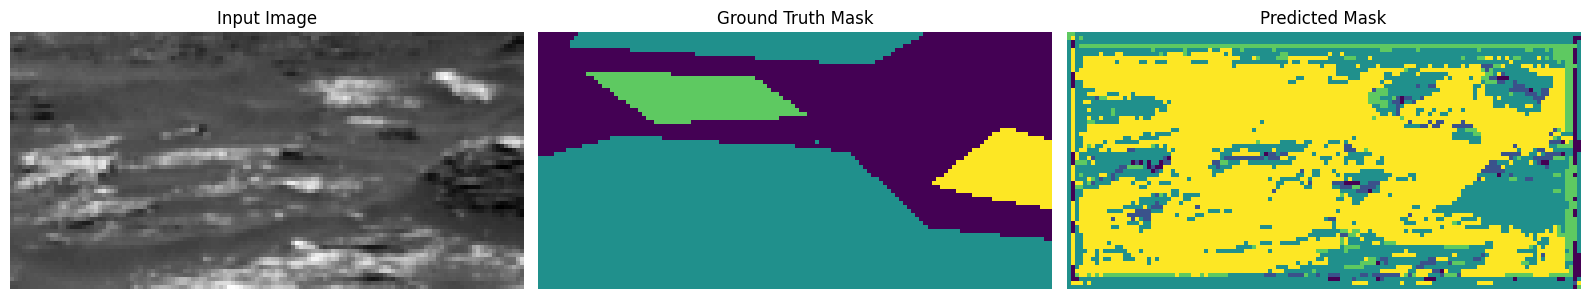

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 376ms/step - accuracy: 0.1833 - loss: 1.3498 - mean_iou: 0.0761 - val_accuracy: 0.1458 - val_loss: 1.3609 - val_mean_iou: 0.0564 - learning_rate: 0.0010
Epoch 12/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.2035 - loss: 1.3531 - mean_iou: 0.0799 - val_accuracy: 0.0913 - val_loss: 1.3609 - val_mean_iou: 0.0545 - learning_rate: 0.0010
Epoch 13/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 365ms/step - accuracy: 0.1768 - loss: 1.3448 - mean_iou: 0.0724 - val_accuracy: 0.2463 - val_loss: 1.3609 - val_mean_iou: 0.1102 - learning_rate: 0.0010
Epoch 14/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 347ms/step - accuracy: 0.1962 - loss: 1.3414 - mean_iou: 0.0801 - val_accuracy: 0.2538 - val_loss: 1.3609 - val_mean_iou: 0.0927 - learning_rate: 0.0010
Epoch 15/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.1823 - loss: 1.3452 - mean_iou: 0.0763 - val_accuracy: 0.1817 - val_loss: 1.3609 - val_mean_iou: 0.0834 - learning_rate: 0.0010
Epoch 16/1000
33/33 ━━━━

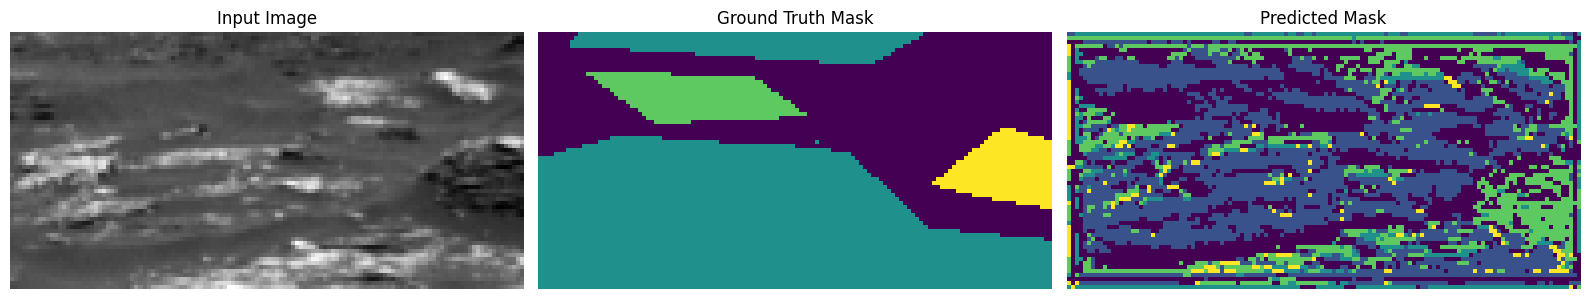

33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 342ms/step - accuracy: 0.1839 - loss: 1.3470 - mean_iou: 0.0768 - val_accuracy: 0.2604 - val_loss: 1.3609 - val_mean_iou: 0.0987 - learning_rate: 0.0010
Epoch 17/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 342ms/step - accuracy: 0.1890 - loss: 1.3459 - mean_iou: 0.0805 - val_accuracy: 0.2429 - val_loss: 1.3609 - val_mean_iou: 0.1035 - learning_rate: 0.0010
Epoch 18/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - accuracy: 0.1886 - loss: 1.3500 - mean_iou: 0.0786 - val_accuracy: 0.2417 - val_loss: 1.3609 - val_mean_iou: 0.1096 - learning_rate: 0.0010
Epoch 19/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 380ms/step - accuracy: 0.1837 - loss: 1.3513 - mean_iou: 0.0807 - val_accuracy: 0.2485 - val_loss: 1.3609 - val_mean_iou: 0.0867 - learning_rate: 0.0010
Epoch 20/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 361ms/step - accuracy: 0.2011 - loss: 1.3549 - mean_iou: 0.0769 - val_accuracy: 0.2222 - val_loss: 1.3609 - val_mean_iou: 0.0744 - learning_rate: 0.0010
Epoch 21/1000
33/33 ━━━━

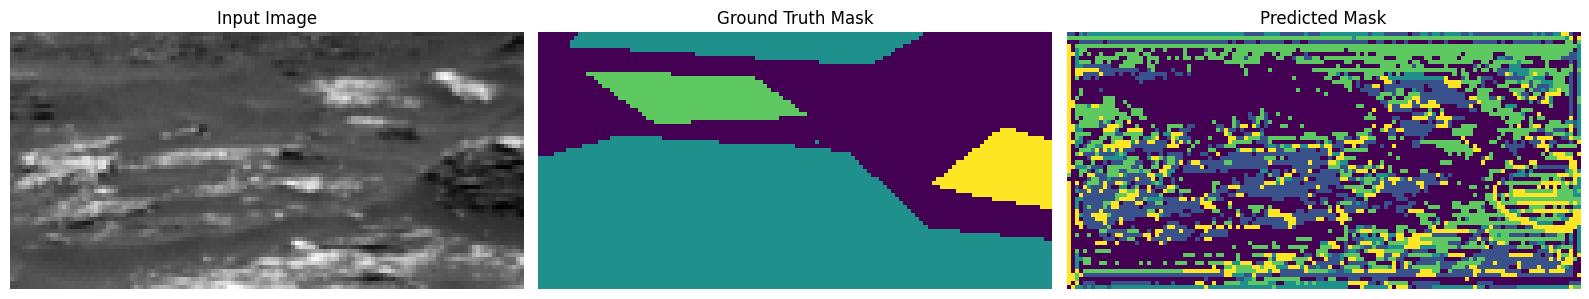

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 370ms/step - accuracy: 0.1875 - loss: 1.3495 - mean_iou: 0.0779 - val_accuracy: 0.2365 - val_loss: 1.3609 - val_mean_iou: 0.0759 - learning_rate: 0.0010
Epoch 22/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 351ms/step - accuracy: 0.1802 - loss: 1.3432 - mean_iou: 0.0777 - val_accuracy: 0.2960 - val_loss: 1.3609 - val_mean_iou: 0.1146 - learning_rate: 0.0010
Epoch 23/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 347ms/step - accuracy: 0.2013 - loss: 1.3384 - mean_iou: 0.0900 - val_accuracy: 0.2361 - val_loss: 1.3609 - val_mean_iou: 0.0823 - learning_rate: 1.0000e-04
Epoch 24/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 360ms/step - accuracy: 0.1911 - loss: 1.3466 - mean_iou: 0.0764 - val_accuracy: 0.2199 - val_loss: 1.3609 - val_mean_iou: 0.0754 - learning_rate: 1.0000e-04
Epoch 25/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 364ms/step - accuracy: 0.1967 - loss: 1.3450 - mean_iou: 0.0805 - val_accuracy: 0.2031 - val_loss: 1.3609 - val_mean_iou: 0.0728 - learning_rate: 1.0000e-04
Epoch 26/100

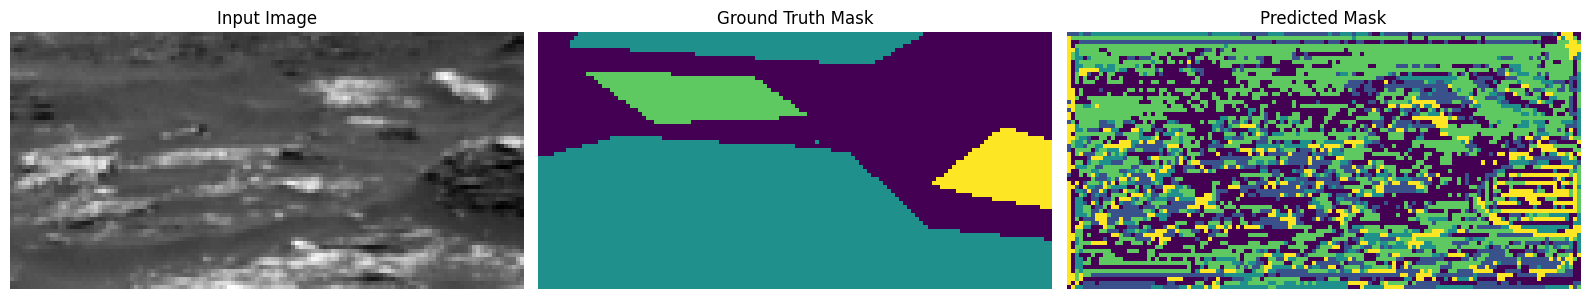

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 378ms/step - accuracy: 0.1886 - loss: 1.3555 - mean_iou: 0.0780 - val_accuracy: 0.2197 - val_loss: 1.3609 - val_mean_iou: 0.0751 - learning_rate: 1.0000e-04
Epoch 27/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 360ms/step - accuracy: 0.2034 - loss: 1.3459 - mean_iou: 0.0822 - val_accuracy: 0.1800 - val_loss: 1.3609 - val_mean_iou: 0.0689 - learning_rate: 1.0000e-04
Epoch 28/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 364ms/step - accuracy: 0.1936 - loss: 1.3546 - mean_iou: 0.0803 - val_accuracy: 0.2236 - val_loss: 1.3609 - val_mean_iou: 0.0841 - learning_rate: 1.0000e-04
Epoch 29/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 365ms/step - accuracy: 0.1849 - loss: 1.3508 - mean_iou: 0.0784 - val_accuracy: 0.2391 - val_loss: 1.3609 - val_mean_iou: 0.0942 - learning_rate: 1.0000e-04
Epoch 30/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 353ms/step - accuracy: 0.1993 - loss: 1.3450 - mean_iou: 0.0827 - val_accuracy: 0.1906 - val_loss: 1.3609 - val_mean_iou: 0.0750 - learning_rate: 1.0000e-04
Epoc

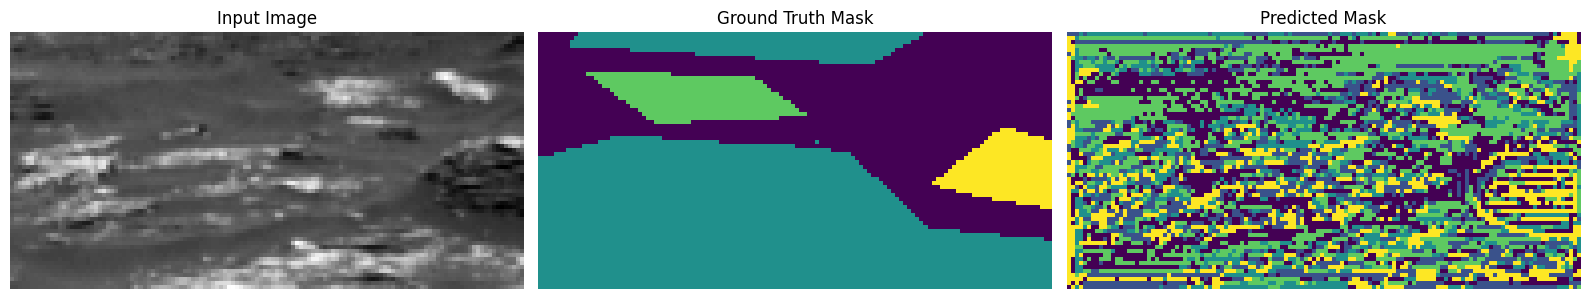

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 362ms/step - accuracy: 0.1952 - loss: 1.3455 - mean_iou: 0.0820 - val_accuracy: 0.1921 - val_loss: 1.3609 - val_mean_iou: 0.0738 - learning_rate: 1.0000e-04
Epoch 32/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 348ms/step - accuracy: 0.1981 - loss: 1.3420 - mean_iou: 0.0799 - val_accuracy: 0.2232 - val_loss: 1.3609 - val_mean_iou: 0.0794 - learning_rate: 1.0000e-04
Epoch 33/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.1922 - loss: 1.3473 - mean_iou: 0.0807 - val_accuracy: 0.2158 - val_loss: 1.3609 - val_mean_iou: 0.0786 - learning_rate: 1.0000e-04
Epoch 34/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 348ms/step - accuracy: 0.1830 - loss: 1.3426 - mean_iou: 0.0782 - val_accuracy: 0.2080 - val_loss: 1.3609 - val_mean_iou: 0.0749 - learning_rate: 1.0000e-04
Epoch 35/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 348ms/step - accuracy: 0.1974 - loss: 1.3484 - mean_iou: 0.0802 - val_accuracy: 0.2075 - val_loss: 1.3609 - val_mean_iou: 0.0811 - learning_rate: 1.0000e-04
Epoc

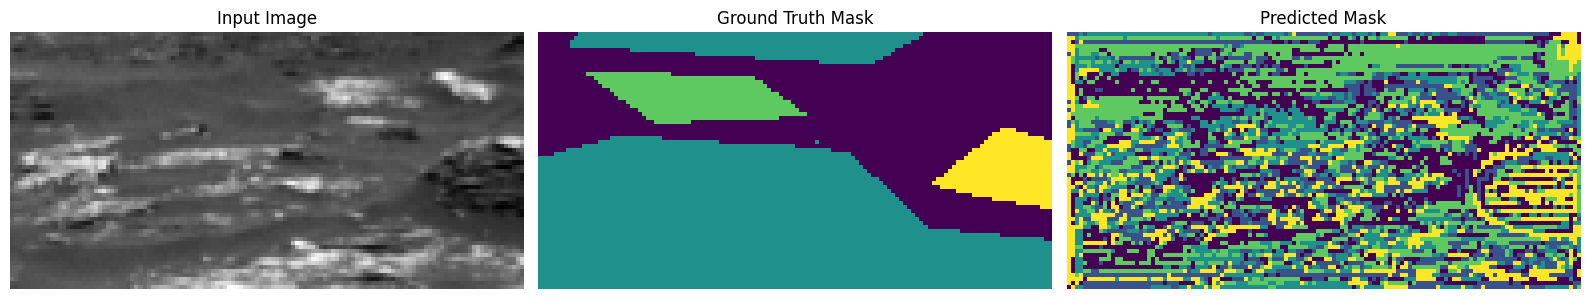

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 365ms/step - accuracy: 0.1852 - loss: 1.3453 - mean_iou: 0.0770 - val_accuracy: 0.1911 - val_loss: 1.3609 - val_mean_iou: 0.0745 - learning_rate: 1.0000e-04
Epoch 37/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 344ms/step - accuracy: 0.2081 - loss: 1.3405 - mean_iou: 0.0807 - val_accuracy: 0.2129 - val_loss: 1.3609 - val_mean_iou: 0.0832 - learning_rate: 1.0000e-04
Epoch 38/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 352ms/step - accuracy: 0.1976 - loss: 1.3547 - mean_iou: 0.0831 - val_accuracy: 0.2059 - val_loss: 1.3609 - val_mean_iou: 0.0766 - learning_rate: 1.0000e-05
Epoch 39/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 368ms/step - accuracy: 0.1955 - loss: 1.3521 - mean_iou: 0.0816 - val_accuracy: 0.2100 - val_loss: 1.3609 - val_mean_iou: 0.0809 - learning_rate: 1.0000e-05
Epoch 40/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 352ms/step - accuracy: 0.1814 - loss: 1.3406 - mean_iou: 0.0816 - val_accuracy: 0.2098 - val_loss: 1.3609 - val_mean_iou: 0.0839 - learning_rate: 1.0000e-05
Epoc

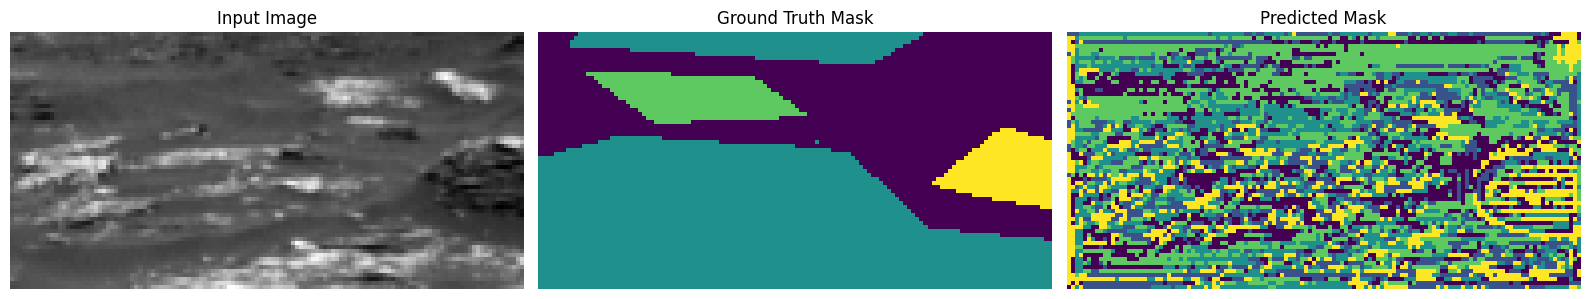

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 363ms/step - accuracy: 0.1818 - loss: 1.3454 - mean_iou: 0.0783 - val_accuracy: 0.1965 - val_loss: 1.3609 - val_mean_iou: 0.0814 - learning_rate: 1.0000e-05
Epoch 42/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 348ms/step - accuracy: 0.2069 - loss: 1.3436 - mean_iou: 0.0837 - val_accuracy: 0.1927 - val_loss: 1.3609 - val_mean_iou: 0.0781 - learning_rate: 1.0000e-05
Epoch 43/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 353ms/step - accuracy: 0.2014 - loss: 1.3498 - mean_iou: 0.0840 - val_accuracy: 0.2047 - val_loss: 1.3609 - val_mean_iou: 0.0814 - learning_rate: 1.0000e-05
Epoch 44/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 350ms/step - accuracy: 0.1803 - loss: 1.3460 - mean_iou: 0.0782 - val_accuracy: 0.2056 - val_loss: 1.3609 - val_mean_iou: 0.0834 - learning_rate: 1.0000e-05
Epoch 45/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 357ms/step - accuracy: 0.2032 - loss: 1.3433 - mean_iou: 0.0839 - val_accuracy: 0.2004 - val_loss: 1.3609 - val_mean_iou: 0.0817 - learning_rate: 1.0000e-05
Epoc

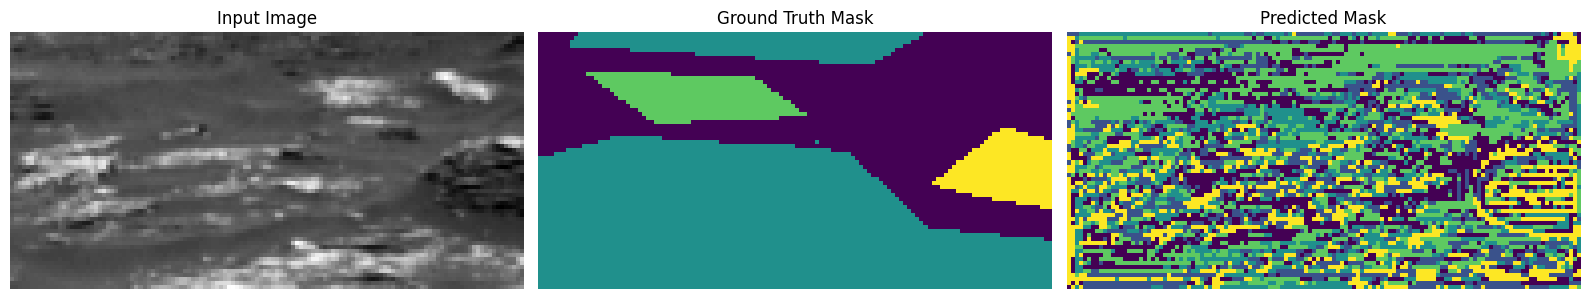

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 432ms/step - accuracy: 0.1876 - loss: 1.3458 - mean_iou: 0.0778 - val_accuracy: 0.2052 - val_loss: 1.3609 - val_mean_iou: 0.0846 - learning_rate: 1.0000e-05
Epoch 47/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 406ms/step - accuracy: 0.2022 - loss: 1.3412 - mean_iou: 0.0821 - val_accuracy: 0.1922 - val_loss: 1.3609 - val_mean_iou: 0.0795 - learning_rate: 1.0000e-05
Epoch 48/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 410ms/step - accuracy: 0.1927 - loss: 1.3509 - mean_iou: 0.0827 - val_accuracy: 0.1927 - val_loss: 1.3609 - val_mean_iou: 0.0788 - learning_rate: 1.0000e-05
Epoch 49/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.1784 - loss: 1.3471 - mean_iou: 0.0777 - val_accuracy: 0.1949 - val_loss: 1.3609 - val_mean_iou: 0.0802 - learning_rate: 1.0000e-05
Epoch 50/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 320ms/step - accuracy: 0.2139 - loss: 1.3456 - mean_iou: 0.0846 - val_accuracy: 0.1975 - val_loss: 1.3609 - val_mean_iou: 0.0778 - learning_rate: 1.0000e-05
Epoc

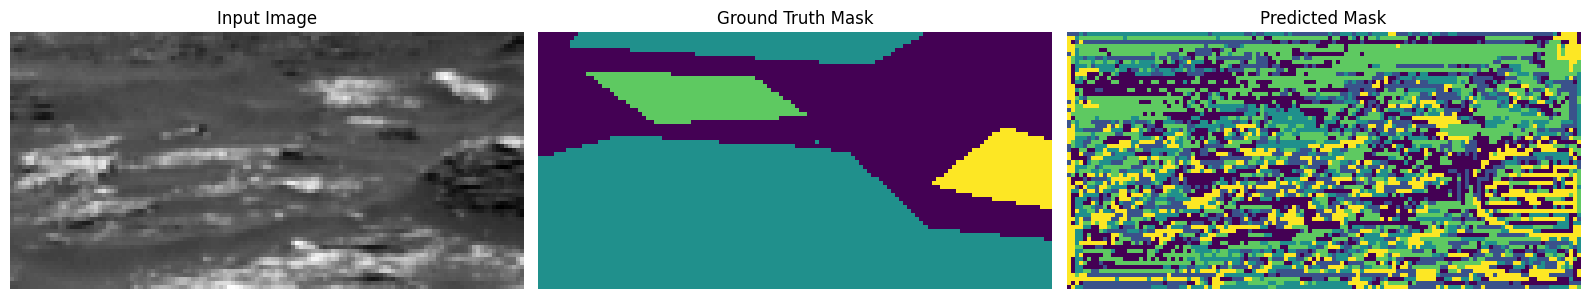

33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.1845 - loss: 1.3539 - mean_iou: 0.0787 - val_accuracy: 0.2110 - val_loss: 1.3609 - val_mean_iou: 0.0846 - learning_rate: 1.0000e-05
Epoch 52/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 325ms/step - accuracy: 0.1920 - loss: 1.3355 - mean_iou: 0.0778 - val_accuracy: 0.1919 - val_loss: 1.3609 - val_mean_iou: 0.0754 - learning_rate: 1.0000e-05
Final validation Mean Intersection Over Union: 11.46%


In [22]:
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=callbacks,
    verbose=1
).history

# Calculate and print the final validation accuracy
final_val_meanIoU = round(max(history['val_mean_iou'])* 100, 2)
print(f'Final validation Mean Intersection Over Union: {final_val_meanIoU}%')

In [23]:
timestep_str = datetime.now().strftime("%y%m%d_%H%M%S")
model_filename = f"model_{timestep_str}.keras"
model.save(model_filename)
del model

print(f"Model saved to {model_filename}")

Model saved to model_241203_200102.keras


## 📊 Prepare Your Submission

In our Kaggle competition, submissions are made as `csv` files. To create a proper `csv` file, you need to flatten your predictions and include an `id` column as the first column of your dataframe. To maintain consistency between your results and our solution, please avoid shuffling the test set. The code below demonstrates how to prepare the `csv` file from your model predictions.




In [24]:
"""
# If model_filename is not defined, load the most recent model from Google Drive
if "model_filename" not in globals() or model_filename is None:
    files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith('model_') and f.endswith('.keras')]
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    if files:
        model_filename = files[0]
    else:
        raise FileNotFoundError("No model files found in the current directory.")
"""

'\n# If model_filename is not defined, load the most recent model from Google Drive\nif "model_filename" not in globals() or model_filename is None:\n    files = [f for f in os.listdir(\'.\') if os.path.isfile(f) and f.startswith(\'model_\') and f.endswith(\'.keras\')]\n    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)\n    if files:\n        model_filename = files[0]\n    else:\n        raise FileNotFoundError("No model files found in the current directory.")\n'

In [25]:
model = tfk.models.load_model(model_filename, compile=False)
print(f"Model loaded from {model_filename}")

Model loaded from model_241203_200102.keras


In [26]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)
print(f"Predictions shape: {preds.shape}")

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step


2024-12-03 20:01:14.391979: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1642004480 exceeds 10% of free system memory.


Predictions shape: (10022, 64, 128)


In [27]:
def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
timestep_str = model_filename.replace("model_", "").replace(".keras", "")
submission_filename = f"submission_{timestep_str}.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

#from google.colab import files
#files.download(submission_filename)

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Alberto Archetti 📧 alberto.archetti@polito.it





```
   Copyright 2024 Alberto Archetti

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```